In [82]:
import warnings
warnings.filterwarnings(action='ignore')

In [218]:
import hangul_font

Hangul font is set!


In [2]:
# scrapy
import scrapy
import requests
from scrapy.http import TextResponse

In [ ]:
# mongodb
import pymongo

In [ ]:
# 인원 수에 따른 와인 수

# Crawling

In [ ]:
# crawling code
'''
pages = 1

result = []

for i in range(pages):
    url = "http://www.wine.co.kr/wine/mine?p={}".format(i)
    req = requests.get(url)
    response = TextResponse(req.url, body=req.text, encoding = "utf-8")
    links = response.xpath('//*[@id="content"]/div/div[2]/ul/li/div[4]/div[2]/a/@href').extract()
    
    for n in range(len(links)):
        datas = 'http://www.wine.co.kr' + links[n]
    
        req = requests.get(datas)
        response = TextResponse(req.url, body=req.text, encoding = "utf-8")
        try:
            result.append({
                "title": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/h1/text()')[0].extract(),
                "img_link": 'http://www.wine.co.kr' + response.xpath('//*[@id="wineMainImage"]/@src')[0].extract(),
                "alcohol": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[1]/strong/span/text()')[0].extract(),
                "size": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[2]/strong/span/text()')[0].extract(),
                "wine_type": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[3]/strong/span/text()')[0].extract(), 
                'sparkling' : response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[4]/strong/span/text()')[0].extract(), 
                "sweetness": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[5]/strong/span/text()')[0].extract(),
                "grape_type": response.xpath('//*[@id="content"]/div/section/div[3]/div[1]/dl[1]/dd/text()')[1].extract().strip(), 
                "country": response.xpath('//*[@id="content"]/div/section/div[3]/div[2]/dl[1]/dd/text()')[1].extract().strip(),
                "aroma": response.xpath('//*[@id="content"]/div/section/div[3]/div[3]/dl[1]/dd/text()')[1].extract().strip(),
                "flavor": response.xpath('//*[@id="content"]/div/section/div[3]/div[4]/dl[1]/dd/text()')[1].extract().strip(),
                "winery": response.xpath('//*[@id="content"]/div/section/div[3]/div[1]/dl[2]/dd/text()')[1].extract().strip(),
                'color' : response.xpath('//*[@id="content"]/div/section/div[3]/div[2]/dl[2]/dd/text()')[1].extract().strip(),
                "food_pairing": response.xpath('//*[@id="content"]/div/section/div[3]/div[3]/dl[2]/dd/text()')[1].extract().strip(), 
                "charms": response.xpath('//*[@id="content"]/div/section/div[3]/div[4]/dl[2]/dd/text()')[1].extract().strip(),
                'link' : datas
        })
        except:
            result.append({
                "title": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/h1/text()')[0].extract(),
                "img_link": 'http://www.wine.co.kr' + response.xpath('//*[@id="wineMainImage"]/@src')[0].extract(),
                "alcohol": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[1]/strong/span/text()')[0].extract(),
                "size": 0,
                "wine_type": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[3]/strong/span/text()')[0].extract(), 
                'sparkling' : response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[4]/strong/span/text()')[0].extract(), 
                "sweetness": response.xpath('//*[@id="content"]/div/section/div[1]/div[2]/div[2]/ul/li[5]/strong/span/text()')[0].extract(),
                "grape_type": response.xpath('//*[@id="content"]/div/section/div[3]/div[1]/dl[1]/dd/text()')[1].extract().strip(), 
                "country": response.xpath('//*[@id="content"]/div/section/div[3]/div[2]/dl[1]/dd/text()')[1].extract().strip(),
                "aroma": response.xpath('//*[@id="content"]/div/section/div[3]/div[3]/dl[1]/dd/text()')[1].extract().strip(),
                "flavor": response.xpath('//*[@id="content"]/div/section/div[3]/div[4]/dl[1]/dd/text()')[1].extract().strip(),
                "winery": response.xpath('//*[@id="content"]/div/section/div[3]/div[1]/dl[2]/dd/text()')[1].extract().strip(),
                'color' : response.xpath('//*[@id="content"]/div/section/div[3]/div[2]/dl[2]/dd/text()')[1].extract().strip(),
                "food_pairing": response.xpath('//*[@id="content"]/div/section/div[3]/div[3]/dl[2]/dd/text()')[1].extract().strip(), 
                "charms": response.xpath('//*[@id="content"]/div/section/div[3]/div[4]/dl[2]/dd/text()')[1].extract().strip(),
                'link' : datas
        })
            

items_df = pd.DataFrame(result)
items_df.tail(2)
'''

In [3]:
items_df = pd.read_csv('./data/lotte_wine_data.csv')
items_df

,Unnamed: 0,title,img_link,alcohol,size,wine_type,sparkling,sweetness,grape_type,country,aroma,flavor,winery,color,food_pairing,charms,link
0,0,2% Sweet White,http://www.wine.co.kr/upload/products/wineList...,2.0%,750ml,White,Still,Sweet,모스카토,"이태리, 피에몬테, 아스티",상큼하고 매력적인 아로마,"깨끗한 모스카토의 아로마가 정교한 과일향과 조화를 잘 이뤄 여성 뿐만 아니라, 모든...",산테로,녹색빛이 도는 밝은 밀짚색,"대부분의 서양음식 뿐만 아니라, 한국음식과도 잘 매칭 됩니다.",2% 모스카토는 신의물방울에 소개된 피에몬테 아스티 지역의 세계적인 와이너리,http://www.wine.co.kr/wine/349
1,1,Gran Tierra Red,http://www.wine.co.kr/upload/products/wineList...,11.0%,750ml,Red,Still,Semi Sweet,기타,"스페인, 발데빼냐스",신선한 과일의 아로마,부드러운 탄닌의 밸런스와 부드러운 여운을 보여주는 이 와인은 달콤한 맛이 잘 살아 ...,Felix Solis,바이올렛의 컬러가 살짝 감도는 반짝이는 루비색,"파스타, 가금류, 육류",합리적인 가격과 부담없는 맛으로 인기 있는 스페인 와인,http://www.wine.co.kr/wine/240
2,2,Gran Tierra White,http://www.wine.co.kr/upload/products/wineList...,10.5%,750ml,White,Still,Semi Sweet,기타,"스페인, 발데빼냐스",각종 꽃과 열대 과일의 아로마,드라이하지 않고 단맛이 잘 살아 있는 미디엄 스위트 와인으로 일상적이고 캐쥬얼한 자...,Felix Solis,신선한 레몬칼라,"생선 및 각종 해산물 요리, 샐러드",합리적인 가격과 부담 없는 맛으로 인기 있는 스페인 와인,http://www.wine.co.kr/wine/241
3,3,Ch' Carmarsac Cuvee Prince Noir,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,"카버네 소비뇽, 멜롯, 기타","프랑스, 보르도, 오메독","붉은 과실향,약간의 흙내음",둥글고 과일향이 풍부하며 산도와 탄닌의 적절한 균형감,La Passion,짙은 루비빛,"각종 고기류, 치즈, 각종 이태리 요리 (스파게티) 등",전형적인 보르도의 클래식한 스타일로 선물용으로도 손색없는 와인이다.,http://www.wine.co.kr/wine/477
4,4,HOBNOB Cabernet Sauvignon,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,카버네 소비뇽,"프랑스, 랑귀독",블루베리 아로마가 처음 코에 와 닿으며 적색과일과 함께후추 등의 향신료향이 느껴진다.,까버네 소비뇽 특유의 탄닌과 산도 그리고 잘 짜여진 구조감으로 마무리 지어진다. 친...,홉노브,짙은 루비빛,"구운고기, 불고기, 각종 고기 및 치즈류 등",Casual스타일의 Easy-Drink 프랑스 와인,http://www.wine.co.kr/wine/449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,JD Chablis Grand Cru,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,기타,"프랑스, 부르고뉴 ,샤블리","레몬, 시트러스향, 부싯돌향",O,Joseph Drouhin,밝은 황금빛,O,부르고뉴의 명가 조셉드루앙은 화이트 와인에 강한 자부심을 가지고 있으며 이를 단적으...,http://www.wine.co.kr/wine/472
512,512,Joseph Drouhin Chablis Reserve de Vaudon,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,샤도네이,"프랑스, 부르고뉴 ,샤블리","전형적인 샤블리 향, 약간의 소금기도 느껴진다",힘차면서도 발랄하며 동시에 정교함과 균형감이 느껴짐,Joseph Drouhin,밝은 황금빛,"신선한 샐러드, 연어, 각종 해산물 요리 등",부르고뉴의 명가 조셉드루앙은 화이트 와인을 잘 만들어 내기로 유명하며 샤블리 화이트...,http://www.wine.co.kr/wine/469
513,513,JD Chablis premier cru vaillons,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,샤도네이,"프랑스, 부르고뉴 ,샤블리","흰꽃, 아스파라거스, 약간의 꿀향",O,Joseph Drouhin,밝은 황금빛,"신선한 샐러드, 연어, 각종 해산물 요리 등",부르고뉴의 명가 조셉드루앙은 화이트 와인을 잘 만들어 내기로 유명하며 샤블리 화이트...,http://www.wine.co.kr/wine/470
514,514,JD Chassagne Montrachet,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,피노누아,"프랑스, 부르고뉴, 꼬뜨 드 본",잘 익은 붉은 과실향,잘 익은 베리류의 과일맛과 약간의 버섯향과 함께 롱 피니쉬가 특징이다.,Joseph Drouhin,밝은 석류빛,"소스에 절인 고기류, 매운 한국 음식, 진한 치즈 등",최상의 빈티지 2009년산으로 샤샤뉴몽라쉐 화이트만큼 유명,http://www.wine.co.kr/wine/471


In [ ]:
# connection to mongodb

client = pymongo.MongoClient("mongodb://15.165.132.58/:27017/")

table = 'wine'

Collection = client.wine[table]
datas = items_df.to_dict('recodes')
Collection.insert(datas)

In [ ]:
# read data from mongodb

df = pd.DataFrame(list(client.wine['wine'].find())).iloc[:,2:]
df

!if mongodb fails
df = items_df

In [6]:
df.columns

Index(['Unnamed: 0', 'title', 'img_link', 'alcohol', 'size', 'wine_type',
       'sparkling', 'sweetness', 'grape_type', 'country', 'aroma', 'flavor',
       'winery', 'color', 'food_pairing', 'charms', 'link'],
      dtype='object')

In [7]:
cols = ['title', 'img_link', 'alcohol', 'size', 'wine_type', 'sparkling', 'sweetness', 'grape_type', 'country', 'aroma', 'flavor',
        'winery', 'color', 'food_pairing', 'charms', 'link']
df = df[cols]
df

,title,img_link,alcohol,size,wine_type,sparkling,sweetness,grape_type,country,aroma,flavor,winery,color,food_pairing,charms,link
0,2% Sweet White,http://www.wine.co.kr/upload/products/wineList...,2.0%,750ml,White,Still,Sweet,모스카토,"이태리, 피에몬테, 아스티",상큼하고 매력적인 아로마,"깨끗한 모스카토의 아로마가 정교한 과일향과 조화를 잘 이뤄 여성 뿐만 아니라, 모든...",산테로,녹색빛이 도는 밝은 밀짚색,"대부분의 서양음식 뿐만 아니라, 한국음식과도 잘 매칭 됩니다.",2% 모스카토는 신의물방울에 소개된 피에몬테 아스티 지역의 세계적인 와이너리,http://www.wine.co.kr/wine/349
1,Gran Tierra Red,http://www.wine.co.kr/upload/products/wineList...,11.0%,750ml,Red,Still,Semi Sweet,기타,"스페인, 발데빼냐스",신선한 과일의 아로마,부드러운 탄닌의 밸런스와 부드러운 여운을 보여주는 이 와인은 달콤한 맛이 잘 살아 ...,Felix Solis,바이올렛의 컬러가 살짝 감도는 반짝이는 루비색,"파스타, 가금류, 육류",합리적인 가격과 부담없는 맛으로 인기 있는 스페인 와인,http://www.wine.co.kr/wine/240
2,Gran Tierra White,http://www.wine.co.kr/upload/products/wineList...,10.5%,750ml,White,Still,Semi Sweet,기타,"스페인, 발데빼냐스",각종 꽃과 열대 과일의 아로마,드라이하지 않고 단맛이 잘 살아 있는 미디엄 스위트 와인으로 일상적이고 캐쥬얼한 자...,Felix Solis,신선한 레몬칼라,"생선 및 각종 해산물 요리, 샐러드",합리적인 가격과 부담 없는 맛으로 인기 있는 스페인 와인,http://www.wine.co.kr/wine/241
3,Ch' Carmarsac Cuvee Prince Noir,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,"카버네 소비뇽, 멜롯, 기타","프랑스, 보르도, 오메독","붉은 과실향,약간의 흙내음",둥글고 과일향이 풍부하며 산도와 탄닌의 적절한 균형감,La Passion,짙은 루비빛,"각종 고기류, 치즈, 각종 이태리 요리 (스파게티) 등",전형적인 보르도의 클래식한 스타일로 선물용으로도 손색없는 와인이다.,http://www.wine.co.kr/wine/477
4,HOBNOB Cabernet Sauvignon,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,카버네 소비뇽,"프랑스, 랑귀독",블루베리 아로마가 처음 코에 와 닿으며 적색과일과 함께후추 등의 향신료향이 느껴진다.,까버네 소비뇽 특유의 탄닌과 산도 그리고 잘 짜여진 구조감으로 마무리 지어진다. 친...,홉노브,짙은 루비빛,"구운고기, 불고기, 각종 고기 및 치즈류 등",Casual스타일의 Easy-Drink 프랑스 와인,http://www.wine.co.kr/wine/449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,JD Chablis Grand Cru,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,기타,"프랑스, 부르고뉴 ,샤블리","레몬, 시트러스향, 부싯돌향",O,Joseph Drouhin,밝은 황금빛,O,부르고뉴의 명가 조셉드루앙은 화이트 와인에 강한 자부심을 가지고 있으며 이를 단적으...,http://www.wine.co.kr/wine/472
512,Joseph Drouhin Chablis Reserve de Vaudon,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,샤도네이,"프랑스, 부르고뉴 ,샤블리","전형적인 샤블리 향, 약간의 소금기도 느껴진다",힘차면서도 발랄하며 동시에 정교함과 균형감이 느껴짐,Joseph Drouhin,밝은 황금빛,"신선한 샐러드, 연어, 각종 해산물 요리 등",부르고뉴의 명가 조셉드루앙은 화이트 와인을 잘 만들어 내기로 유명하며 샤블리 화이트...,http://www.wine.co.kr/wine/469
513,JD Chablis premier cru vaillons,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,샤도네이,"프랑스, 부르고뉴 ,샤블리","흰꽃, 아스파라거스, 약간의 꿀향",O,Joseph Drouhin,밝은 황금빛,"신선한 샐러드, 연어, 각종 해산물 요리 등",부르고뉴의 명가 조셉드루앙은 화이트 와인을 잘 만들어 내기로 유명하며 샤블리 화이트...,http://www.wine.co.kr/wine/470
514,JD Chassagne Montrachet,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,피노누아,"프랑스, 부르고뉴, 꼬뜨 드 본",잘 익은 붉은 과실향,잘 익은 베리류의 과일맛과 약간의 버섯향과 함께 롱 피니쉬가 특징이다.,Joseph Drouhin,밝은 석류빛,"소스에 절인 고기류, 매운 한국 음식, 진한 치즈 등",최상의 빈티지 2009년산으로 샤샤뉴몽라쉐 화이트만큼 유명,http://www.wine.co.kr/wine/471


In [8]:
# price range 추가

ls0_2 = [349, 240,241, 449, 579, 578, 633, 634, 127, 242, 246, 638, 635, 639, 636, 640, 637, 602, 366, 596, 19, 605,
        603, 604, 13, 601, 608, 684, 609, 493, 363, 361, 362, 364, 445, 20, 21, 14, 281, 280, 15, 694, 687, 695, 691, 
        688, 689, 690, 692, 693, 334, 239, 39, 204, 205, 206, 580, 581, 448, 500, 499, 496, 501, 497, 498, 447, 495, 
        494, 243, 644, 643, 645, 642, 589, 588, 112, 113, 115, 118, 116, 117, 256, 741, 641, 624, 623, 646, 650, 648,
        652, 649, 257, 704, 705, 352, 350, 353, 355, 358, 351, 354, 356, 583, 247, 446, 365, 370, 371, 372, 369, 373,
        374]

ls2_4 = [226, 225, 224, 223, 12, 569, 570, 571, 607, 606, 567, 123, 10, 11, 9, 513, 514, 512, 509, 508, 510, 511, 507,
        380, 203, 201, 202, 200, 379, 504, 564, 378, 16, 17, 590, 119, 120, 534, 536, 535, 533, 531, 529, 532, 530, 
        528, 527, 383, 382, 620,621, 618, 617, 619, 625, 626, 629, 631, 628, 627, 630, 632, 341, 58, 702, 568, 565, 
        566, 384, 385, 18]

ls4_9 = [161, 162, 160, 166, 661, 662, 663, 677, 672, 680, 675, 266, 268, 267, 270, 251, 682, 274, 273, 277, 276, 279,
        278, 275, 683, 312, 316, 260, 284, 283, 707, 517, 518, 516, 515, 519, 235, 218, 217, 199, 216, 198, 563, 560,
        561, 556, 557, 562, 681, 673, 664, 678, 709, 473, 679, 660, 558, 671, 669, 670, 667, 668, 665, 666, 545, 544, 
        546, 543, 541, 539, 542, 537, 335, 337, 338, 339, 333, 347, 676, 613, 615, 614, 616, 622, 177, 173, 174, 175,
        168, 169, 178, 340, 264, 674, 573, 574, 575, 572, 576, 696, 697, 582, 314, 313, 311, 315, 98, 95, 101, 96, 97,
        100, 465, 459, 451, 450, 460, 463, 458, 466, 456, 452, 462, 461, 453, 468, 472, 469, 470, 471, 467, 455, 454,
        457, 464]

ls9_15 = [477, 326, 324, 413, 386, 440, 252, 254, 483, 481, 482, 287, 489, 488, 490, 491, 289, 291, 285, 290, 299, 286,
         298, 708, 325, 322, 321, 424, 476, 475, 319, 715, 403, 492, 344, 318, 56, 57, 54, 55, 61, 60, 62, 59, 307, 
         309, 306, 320, 308, 303, 99, 34, 33, 35, 32, 31]

ls_15_over = [297, 293, 292, 295, 524, 522, 520, 521, 523, 525, 526, 222, 196, 427, 437, 431, 439, 410, 423, 429, 411, 419,
       433, 412, 406, 408, 404, 425, 422, 435, 426, 405, 414, 436, 417, 430, 434, 428, 420, 417, 407, 416, 421, 415,
       438, 389, 393, 394, 391, 395, 390, 396, 388, 387,397, 398, 392, 399, 400, 381, 401, 402, 441, 409, 551, 550,
       552, 548, 549, 547, 553, 611, 612, 703, 282, 102]

df['price_range'] = None

for i in range(len(df)):
    if df['link'][i][-3:][0] == '/':
        if int(df['link'][i][-2:]) in ls0_2:
            df['price_range'][i] = '0~2만원'
        elif int(df['link'][i][-2:]) in ls2_4:
            df['price_range'][i] = '2~4만원'
        elif int(df['link'][i][-2:]) in ls4_9:
            df['price_range'][i] = '4~9만원'
        elif int(df['link'][i][-2:]) in ls9_15:
            df['price_range'][i] = '9~15만원'
        else:
            df['price_range'][i] = '15만원 이상'
    
    elif df['link'][i][-3:][0] == 'e':
        if int(df['link'][i][-1:]) in ls0_2:
            df['price_range'][i] = '0~2만원'
        elif int(df['link'][i][-1:]) in ls2_4:
            df['price_range'][i] = '2~4만원'
        elif int(df['link'][i][-1:]) in ls4_9:
            df['price_range'][i] = '4~9만원'
        elif int(df['link'][i][-1:]) in ls9_15:
            df['price_range'][i] = '9~15만원'
        else:
            df['price_range'][i] = '15만원 이상'
    
    else:
        if int(df['link'][i][-3:]) in ls0_2:
            df['price_range'][i] = '0~2만원'
        elif int(df['link'][i][-3:]) in ls2_4:
            df['price_range'][i] = '2~4만원'
        elif int(df['link'][i][-3:]) in ls4_9:
            df['price_range'][i] = '4~9만원'
        elif int(df['link'][i][-3:]) in ls9_15:
            df['price_range'][i] = '9~15만원'
        else:
            df['price_range'][i] = '15만원 이상'

df['price_range']

0       0~2만원
1       0~2만원
2       0~2만원
3      9~15만원
4       0~2만원
        ...  
511     4~9만원
512     4~9만원
513     4~9만원
514     4~9만원
515     4~9만원
Name: price_range, Length: 516, dtype: object

In [9]:
# use the first keyword in grape_type
for i in range(len(df)):
    try:
        df['grape_type'][i] = df['grape_type'][i].split(',')[0]
    except:
        pass

df['grape_type']

0         모스카토
1           기타
2           기타
3      카버네 소비뇽
4      카버네 소비뇽
        ...   
511         기타
512       샤도네이
513       샤도네이
514       피노누아
515       샤도네이
Name: grape_type, Length: 516, dtype: object

In [10]:
df['grape_type'].unique()

array(['모스카토', '기타', '카버네 소비뇽', '멜롯', '샤도네이', '쉬라즈', '피노누아', '쇼비뇽 블랑',
       nan], dtype=object)

In [11]:
# translate grape_type in Korean to English

for i in range(len(df)):
        if df['grape_type'][i] == '모스카토':
            df['grape_type'][i] = 'Moscato'
        elif df['grape_type'][i] == '기타':
            df['grape_type'][i] = 'etc'
        elif df['grape_type'][i] == '카버네 소비뇽':
            df['grape_type'][i] = 'Cabernet Sauvignon'
        elif df['grape_type'][i] == '멜롯':
            df['grape_type'][i] = 'Merlot'
        elif df['grape_type'][i] == '샤도네이':
            df['grape_type'][i] = 'Chardonnay'
        elif df['grape_type'][i] == '쉬라즈':
            df['grape_type'][i] = 'Syrah'
        elif df['grape_type'][i] == '피노누아':
            df['grape_type'][i] = 'Pinor Noir'
        elif df['grape_type'][i] == '쇼비뇽 블랑':
            df['grape_type'][i] = 'Sauvignon Blanc'

In [12]:
df['grape_type']

0                 Moscato
1                     etc
2                     etc
3      Cabernet Sauvignon
4      Cabernet Sauvignon
              ...        
511                   etc
512            Chardonnay
513            Chardonnay
514            Pinor Noir
515            Chardonnay
Name: grape_type, Length: 516, dtype: object

In [74]:
boldness_score = []
boldness_score.append({'Tannet' : 40/40*10})
boldness_score.append({'Sagratino' : 39/40*10})
boldness_score.append({'Petite Sirah' : 38/40*10})
boldness_score.append({'Touriga Nacional' : 37/40*10})
boldness_score.append({'Mourvedre' : 36/40*10})
boldness_score.append({'Petit Verdot' : 35/40*10})
boldness_score.append({'Pinotage' : 34/40*10})
boldness_score.append({'Syrah' : 33/40*10})
boldness_score.append({'Cabernet Sauvignon' : 32/40*10})
boldness_score.append({'Bordeaux Blend' : 31/40*10})
boldness_score.append({'Malbec' : 30/40*10})
boldness_score.append({'Agliance' : 29/40*10})
boldness_score.append({"Nero d'Avola" : 28/40*10})
boldness_score.append({'Nebbiolo' : 27/40*10})
boldness_score.append({'Tempranillo' : 26/40*10})
boldness_score.append({'Zinfandel' : 25/40*10})
boldness_score.append({'Montepulciano' : 24/40*10})
boldness_score.append({'Merlot' : 23/40*10})
boldness_score.append({'Barbera' : 22/40*10})
boldness_score.append({'Rhone/GSM Blend' : 21/40*10})
boldness_score.append({'Negromaro' : 20/40*10})
boldness_score.append({'Sangiovese' : 19/40*10})
boldness_score.append({'Mencia' : 18/40*10})
boldness_score.append({'Cabernet Franc' : 17/40*10})
boldness_score.append({'Carignan' : 16/40*10})
boldness_score.append({'Carmenere' : 15/40*10})
boldness_score.append({'Bobal' : 14/40*10})
boldness_score.append({'Valpolicella Blend' : 13/40*10})
boldness_score.append({'Grenache' : 12/40*10})
boldness_score.append({'Garnacha' : 12/40*10})
boldness_score.append({'Viognier' : 11/40*10})
boldness_score.append({'Moscato' : 10/40*10})
boldness_score.append({'Champagne' : 9/40*10})
boldness_score.append({'Pinot Noir' : 8/40*10})
boldness_score.append({'Chardonnay' : 7/40*10})
boldness_score.append({'Gamay' : 6/40*10})
boldness_score.append({'Schihiava' : 5/40*10})
boldness_score.append({'Riesling' : 4/40*10})
boldness_score.append({'Cava' : 3/40*10})
boldness_score.append({'Sauvignon Blanc' : 2/40*10})
boldness_score.append({'Pinot Grigio' : 1/40*10})

In [14]:
# changing sweetness to a number
df['sweetness'].unique()

array(['Sweet', 'Semi Sweet', 'Dry', 'Medium Dry', 'Medium Sweet'],
      dtype=object)

In [29]:
# removing duplicate values
df = df.drop_duplicates(keep='first')
df.reset_index(inplace=True, drop=True)

# 데이터 분석

In [15]:
df.columns

Index(['title', 'img_link', 'alcohol', 'size', 'wine_type', 'sparkling',
       'sweetness', 'grape_type', 'country', 'aroma', 'flavor', 'winery',
       'color', 'food_pairing', 'charms', 'link', 'price_range'],
      dtype='object')

In [26]:
df.grape_type.unique()

array(['Moscato', 'etc', 'Cabernet Sauvignon', 'Merlot', 'Chardonnay',
       'Syrah', 'Pinor Noir', 'Sauvignon Blanc', nan], dtype=object)

## assigning appropriate grape type for wines w/o grape_type

### assignment of grape type according to wine title

In [61]:
df.grape_type.unique()[:8]

array(['Moscato', 'etc', 'Cabernet Sauvignon', 'Merlot', 'Chardonnay',
       'Syrah', 'Pinor Noir', 'Sauvignon Blanc'], dtype=object)

In [63]:
for idx in df[df.grape_type=='etc'].index:
    for grape in list(df.grape_type.unique()[:8]):
        if grape in df.loc[idx]['title']:
            df.loc[idx].grape_type = grape

In [65]:
len(df[df.grape_type=='etc'].index)

152

In [75]:
extra_list = ['Tannet', 'Sagratino', 'Petite Sirah', 'Touriga Nacional', 'Mourvedre', 'Petit Verdot', 'Pinotage', 'Syrah', 'Cabernet Sauvignon', 'Bordeaux Blend', 'Malbec', 'Agliance', "Nero d'Avola", 'Nebbiolo', 'Tempranillo', 'Zinfandel', 'Montepulciano', 'Merlot', 'Barbera', 'Rhone/GSM Blend', 'Negromaro', 'Sangiovese', 'Mencia', 'Cabernet Franc', 'Carignan', 'Carmenere', 'Bobal', 'Valpolicella Blend', 'Grenache', 'Garnacha', 'Viognier', 'Moscato', 'Champagne', 'Pinot Noir', 'Chardonnay', 'Gamay', 'Schihiava', 'Riesling', 'Cava', 'Sauvignon Blanc', 'Pinot Grigio']

In [72]:
for idx in df[df.grape_type=='etc'].index:
    for grape in extra_list:
        if grape in df.loc[idx]['title']:
            df.loc[idx].grape_type = grape

In [73]:
len(df[df.grape_type=='etc'].index)

118

In [ ]:
pd.set_option('display.max_rows', 118)

In [69]:
print(df[df.grape_type=='etc'][['title', 'link']])

                                                 title  \
1                                     Gran Tierra Red    
2                                   Gran Tierra White    
9                 San Felice Rosso di Montalcino DOCG    
10             San Felice Brunello di Montalcino DOCG    
12                            Cotes-du-Rhone Samorens    
13                            Cotes-du-Rhone Samorens    
15                                      Cote du Rhone    
16                             Cote du Rhone Villages    
17                          Cote-Rotie Brune & Blonde    
18                                           Condrieu    
19                                Cuvee Special Blanc    
20                                Cuvee Special Rouge    
32                                   LAN Gran Reserva    
33                                LAN Limited Edition    
34                                        LAN Crianza    
38                              Remy Pannier Muscadet    
39            

In [295]:
# manual insertion
df.loc[1, 'grape_type'] = 'Tempranillo'
df.loc[2, 'grape_type'] = 'Airen'
df.loc[9, 'grape_type'] = 'Sangiovese'
df.loc[10, 'grape_type'] = 'Sangiovese'
df.loc[12, 'grape_type'] = 'Grenache'
df.loc[13, 'grape_type'] = 'Roussanne'
df.loc[15, 'grape_type'] = 'Grenache'
df.loc[16, 'grape_type'] = 'Grenache'
df.loc[17, 'grape_type'] = 'Syrah'
df.loc[18, 'grape_type'] = 'Viognier'
df.loc[19, 'grape_type'] = 'Sauvignon Blanc'
df.loc[20, 'grape_type'] = 'Grenache'
df.loc[23, 'grape_type'] = 'Malbec'
df.loc[25, 'grape_type'] = 'Malbec'
df.loc[28, 'grape_type'] = 'Carmenere'
df.loc[32, 'grape_type'] = 'Tempranillo'
df.loc[33, 'grape_type'] = 'Tempranillo'
df.loc[34, 'grape_type'] = 'Tempranillo'
df.loc[38, 'grape_type'] = 'Melon de Bourgogne'
df.loc[39, 'grape_type'] = 'Tempranillo'
df.loc[40, 'grape_type'] = 'Brachetto'
df.loc[41, 'grape_type'] = 'Brachetto'
df.loc[52, 'grape_type'] = 'Cabernet Franc'
df.loc[60, 'grape_type'] = 'Brachetto'
df.loc[66, 'grape_type'] = 'Ugni Blanc'
df.loc[67, 'grape_type'] = 'Ugni Blanc'
df.loc[68, 'grape_type'] = 'Riesling'
df.loc[69, 'grape_type'] = 'Riesling'
df.loc[72, 'grape_type'] = 'Riesling'
df.loc[73, 'grape_type'] = 'Riesling'
df.loc[77, 'grape_type'] = 'Campbell Early' # 마주앙 아로니아
df.loc[78, 'grape_type'] = 'Muscat Bailey A' # 마주앙
df.loc[91, 'grape_type'] = 'Dornfelder'
df.loc[93, 'grape_type'] = 'Riesling'
df.loc[98, 'grape_type'] = 'Cortese'
df.loc[99, 'grape_type'] = 'Sangiovese'
df.loc[100, 'grape_type'] = 'Sangiovese'
df.loc[101, 'grape_type'] = 'Sangiovese'
df.loc[102, 'grape_type'] = 'Brachetto'
df.loc[104, 'grape_type'] = 'Sangiovese'
df.loc[105, 'grape_type'] = 'Sangiovese'
df.loc[112, 'grape_type'] = 'Sangiovese'
df.loc[119, 'grape_type'] = 'Riesling'
df.loc[143, 'grape_type'] = 'Pinot Grigio'
df.loc[147, 'grape_type'] = 'Pinot Noir'
df.loc[150, 'grape_type'] = 'Primitivo'
df.loc[152, 'grape_type'] = 'Gamay'
df.loc[153, 'grape_type'] = 'Tempranillo'
df.loc[154, 'grape_type'] = 'Airen'
df.loc[197, 'grape_type'] = 'Cabernet Sauvignon'
df.loc[198, 'grape_type'] = 'Chardonnay'
df.loc[199, 'grape_type'] = 'Sangiovese'
df.loc[201, 'grape_type'] = 'Sangiovese'
df.loc[205, 'grape_type'] = 'Syrah'
df.loc[207, 'grape_type'] = 'Sauvignon Blanc'
df.loc[216, 'grape_type'] = 'Sauvignon Blanc'
df.loc[248, 'grape_type'] = 'Grenache'
df.loc[249, 'grape_type'] = 'Grenache'
df.loc[266, 'grape_type'] = 'Nebbiolo'
df.loc[270, 'grape_type'] = 'Carignan'
df.loc[277, 'grape_type'] = 'Riesling'
df.loc[278, 'grape_type'] = 'Airen'
df.loc[281, 'grape_type'] = 'Zinfandel'
df.loc[284, 'grape_type'] = 'Zinfandel' #limited edition
df.loc[285, 'grape_type'] = 'Pinot Noir'
df.loc[289, 'grape_type'] = 'Riesling'
df.loc[292, 'grape_type'] = 'Syrah'
df.loc[293, 'grape_type'] = 'Syrah'
df.loc[310, 'grape_type'] = 'Tempranillo'
df.loc[312, 'grape_type'] = 'Gewurztraminer'
df.loc[313, 'grape_type'] = 'Riesling'
df.loc[314, 'grape_type'] = 'Pinot Grigio'
df.loc[315, 'grape_type'] = 'Pinot Grigio'
df.loc[317, 'grape_type'] = 'Pinot Grigio'
df.loc[318, 'grape_type'] = 'Pinot Grigio'
df.loc[348, 'grape_type'] = 'Cabernet Sauvignon'
df.loc[349, 'grape_type'] = 'Sangiovese'
df.loc[350, 'grape_type'] = 'Corvina'
df.loc[351, 'grape_type'] = 'Garganega'
df.loc[353, 'grape_type'] = 'Glera'
df.loc[354, 'grape_type'] = 'Pinot Grigio'
df.loc[356, 'grape_type'] = 'Gamay'
df.loc[357, 'grape_type'] = 'Grenache'
df.loc[389, 'grape_type'] = 'Sangiovese'
df.loc[390, 'grape_type'] = 'Sangiovese'
df.loc[409, 'grape_type'] = 'Sangiovese'
df.loc[410, 'grape_type'] = 'Syrah'
df.loc[420, 'grape_type'] = 'Vidal Blanc'
df.loc[429, 'grape_type'] = 'Sauvignon Blanc'
df.loc[434, 'grape_type'] = 'Malbec'
df.loc[450, 'grape_type'] = 'Airen' #1l
df.loc[452, 'grape_type'] = 'Tempranillo'
df.loc[454, 'grape_type'] = 'Sangiovese'
df.loc[455, 'grape_type'] = 'Nebbiolo'
df.loc[458, 'grape_type'] = 'Nebbiolo'
df.loc[463, 'grape_type'] = 'Nebbiolo'
df.loc[464, 'grape_type'] = 'Dolcetto'
df.loc[465, 'grape_type'] = 'Cortese'
df.loc[467, 'grape_type'] = 'Gamay' # title needs spacing
df.loc[490, 'grape_type'] = 'Gamay'

In [81]:
# null values in grape type
print(df[df.grape_type.isnull()][['title', 'link']])

                                    title                            link
62            Reserve Cabernet Sauvignon   http://www.wine.co.kr/wine/569
421   Thomas Barton Reserve Graves Blanc   http://www.wine.co.kr/wine/573
423          Thomas Barton Reserve Medoc   http://www.wine.co.kr/wine/575
425  Thomas Barton Reserve Saint Emilion   http://www.wine.co.kr/wine/576


In [86]:
# manual insertion of data
df.loc[62, 'grape_type'] = 'Cabernet Sauvignon'
df.loc[421, 'grape_type'] = 'Semillon'
df.loc[423, 'grape_type'] = 'Merlot'
df.loc[425, 'grape_type'] = 'Merlot'

In [87]:
pd.set_option('display.max_rows', 60)

## 이상치 확인

### grape type

In [ ]:
# same wine, different size
# 410                        Carlo Rossi Sweet Red 1500ml 
# 411                        Carlo Rossi Sweet Red 3000ml 
# 412                         Carlo Rossi Sweet Red 750ml
# 392, 393, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406

In [ ]:
# 76 마주앙 시그니처 코리아 프리미엄 한정판 심지어 포도품종 경북 영천에서 재배된 머스캣 베일리 에이
# 97 grape type이 너무 많이 섞인 블렌드

### grape_type in accordance to wine_type

In [202]:
# 39 loto 와인 화이트가 아니라 레드
df.loc[39]['wine_type'] = 'Red'

In [203]:
df.wine_type.value_counts()

Red      351
White    141
Rose      11
기타         1
Name: wine_type, dtype: int64

In [204]:
df[df.wine_type == '기타']

,title,img_link,alcohol,size,wine_type,sparkling,sweetness,grape_type,country,aroma,flavor,winery,color,food_pairing,charms,link,price_range
143,Barefoot Bubbly Pinot Grigio,http://www.wine.co.kr/upload/products/wineList...,11.5%,750ml,기타,Sparkling,Sweet,Pinot Grigio,"미국, 캘리포니아","쥬시한 피치향, 잘 익은 배와 오렌지 향",잘 익은 과일과 스위트한 시트러스,베어풋,지푸라기색,"그릴에 요리된 채소, 로스티드 치킨","베어풋 버블리 피노 그리지오는 캘리포니아 포도로만 생산되고, 과일의 풍미가 탄산과 ...",http://www.wine.co.kr/wine/691,0~2만원


In [205]:
df.loc[143]['wine_type'] = 'White'

In [206]:
# no outliers
df[df.wine_type == 'Red']['grape_type'].value_counts()

Cabernet Sauvignon    167
Syrah                  41
Merlot                 36
Sangiovese             15
Pinor Noir             15
etc                    13
Malbec                 11
Tempranillo            10
Grenache                7
Carmenere               6
Zinfandel               5
Nebbiolo                5
Barbera                 4
Gamay                   4
Brachetto               2
Pinot Noir              2
Chardonnay              1
Dolcetto                1
Dornfelder              1
Campbell Early          1
Primitivo               1
Corvina                 1
Muscat Bailey A         1
Carignan                1
Name: grape_type, dtype: int64

In [207]:
df[df.wine_type == 'White']['grape_type'].value_counts()

Chardonnay            52
Sauvignon Blanc       18
Moscato               16
Riesling              13
Pinor Noir            10
etc                    7
Airen                  4
Pinot Gris             4
Cava                   2
Pinot Grigio           2
Cortese                2
Ugni Blanc             2
Garganega              1
Semillon               1
Viognier               1
Gewurztraminer         1
Vidal Blanc            1
Melon de Bourgogne     1
Merlot                 1
Roussanne              1
Glera                  1
Cabernet Sauvignon     1
Name: grape_type, dtype: int64

In [208]:
df[(df.wine_type == 'White') & (df['grape_type'] == 'Cabernet Sauvignon')][['title', 'link']]

,title,link
383,Casablanca Nimbus Cabernet Sauvignon,http://www.wine.co.kr/wine/173


In [209]:
df.loc[383]['wine_type'] = 'Red'

In [210]:
df[(df.wine_type == 'White') & (df['grape_type'] == 'Tempranillo')][['title', 'link']]

,title,link


In [211]:
df.loc[39]['wine_type'] = 'Red'

In [212]:
# 포도 품종이 잘못 기입됐다
# Merlot X -> Chardonnay
df[(df.wine_type == 'White') & (df['grape_type'] == 'Merlot')][['title', 'link']]

,title,link
488,Joseph Drouhin La Foret Bourgogne Blanc,http://www.wine.co.kr/wine/450


In [213]:
df.loc[39]['grape_type'] = 'Chardonnay'

In [214]:
#Pinot Grigio and Pinot Gris are the same grape type
'Pinot Grigio'

'Pinot Grigio'

In [215]:
# Rose의 경우 red 품종을 주로 써서 껍질이 약 두 시간 정도 담겨 있다 제거되는 핑크 와인이다
df[df.wine_type == 'Rose']['grape_type'].value_counts()

Pinor Noir        2
Syrah             2
Brachetto         2
Zinfandel         2
Moscato           1
etc               1
Cabernet Franc    1
Name: grape_type, dtype: int64

In [ ]:
# items_df.isnull().sum()

In [ ]:
# items_df[(items_df['wine_type'] == 'White') & (items_df['grape_type'] == '멜롯')]

In [ ]:
# 실제로 샤도네이인데 '멜롯' 오타 난듯

# items_df[(items_df['wine_type'] == 'White') & (items_df['grape_type'] == '멜롯')].loc[:,'grape_type'] = '샤도네이'

In [ ]:
# 이상치 제거

# items_df.loc[500, 'grape_type'] = '샤도네이'

## food pairing: one hot encoding 

In [234]:
import nltk
from konlpy.tag import Okt; t = Okt()
from pandas.core.common import flatten

In [251]:
ls = []
for data in list(df[~df.food_pairing.isnull()].food_pairing):
    news_word = t.nouns(data)
    ls.append(news_word)

In [281]:
ko = nltk.Text(list(flatten(ls)))

In [285]:
from matplotlib import rc
import 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


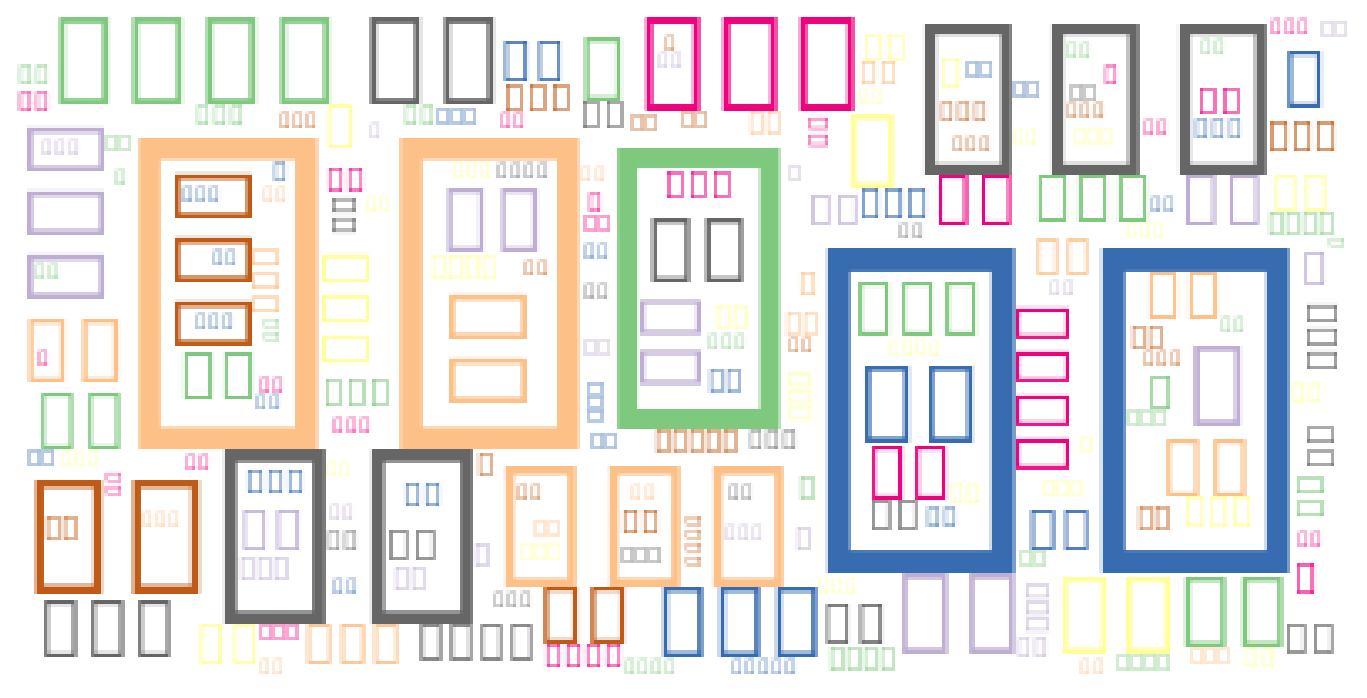

In [291]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',                             # 배경 색깔 정하기
                      colormap = 'Accent_r',                                # 폰트 색깔 정하기
                     ).generate_from_frequencies(dict(ko.vocab()))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [293]:
# 어쩄든 수작업 라벨링
pd.set_option('display.max_rows', 504)

In [256]:
list(flatten(ls))

['대부분',
 '서양',
 '음식',
 '뿐',
 '한국',
 '음식',
 '매칭',
 '파스타',
 '가금류',
 '육류',
 '생선',
 '및',
 '각종',
 '해산물',
 '요리',
 '샐러드',
 '각종',
 '기류',
 '치즈',
 '각종',
 '이태리',
 '요리',
 '스파게티',
 '등',
 '운',
 '고기',
 '불고기',
 '각종',
 '고기',
 '및',
 '치즈',
 '류',
 '등',
 '육류',
 '파스타',
 '치즈',
 '살',
 '육류',
 '각종',
 '해산물',
 '치즈',
 '육류',
 '파스타',
 '치즈',
 '육류',
 '파스타',
 '치즈',
 '돼지고기',
 '송아지',
 '정강이',
 '살',
 '요리',
 '고기',
 '버섯',
 '파스타',
 '로스트',
 '사냥',
 '고기',
 '페',
 '치즈',
 '등',
 '전골',
 '수육',
 '포크',
 '바베큐',
 '립',
 '꼬치',
 '구이',
 '브뤼',
 '치즈',
 '안심',
 '요리',
 '등',
 '육류',
 '운',
 '가지',
 '요리',
 '치즈',
 '류',
 '등',
 '생선',
 '요리',
 '디저트',
 '과일',
 '류',
 '등',
 '양',
 '고기',
 '등',
 '육류',
 '숙성',
 '치즈',
 '등',
 '육류',
 '운',
 '가지',
 '요리',
 '치즈',
 '류',
 '등',
 '육류',
 '달고기',
 '요리',
 '치즈',
 '등',
 '육류',
 '치즈',
 '등',
 '가리비',
 '요리',
 '생선',
 '요리',
 '염소',
 '치즈',
 '등',
 '해산물',
 '초밥',
 '살',
 '고기',
 '요리',
 '등',
 '육류',
 '요리',
 '치즈',
 '등',
 '치즈',
 '샐러드',
 '해산물',
 '치즈',
 '소고기',
 '스테이크',
 '돼지고기',
 '필레',
 '미뇽',
 '오븐',
 '운',
 '갈비',
 '오리',
 '토끼',
 '양고기',
 '토마토',
 '소스',
 '파스

In [338]:
cheese = ['치즈', '브뤼', '체다']
red_meat = ['비프', '송아지', '닭', '고기', '스테이크', '육류', '가금류', '송아지', '정강이', '전골', '수육', '포크', '바베큐', '바비큐', '립', '꼬치', '안심', '미뇽', '오리', '토끼', '갈비', '양고기', '스튜', '살라미', '케밥', '미트볼', '램', '커틀릿', '치킨', '굴라쉬', '하몽', '돼지', '엽조류', '칠면조', '포와그라', '소시지', '메추리', '푸아그라', '거위간']
seafood = ['해산물', '생선', '가리비', '초밥', '랍스터', '회', '조개', '연어', '스시', '고등어', '갑각류', '메로구이', '도미', '참치', '생선회', '새우', '갈치', '어패류']
dessert = ['디저트', '케이크', '쵸콜릿', '초콜릿', '페스츄리', '쿠키', '케익', '페스트리', '아이스크림', '티라미수']
fruits_vegetables = ['샐러드', '가지', '과일', '딸기', '야채']
# 파스타: 파스타, 스파게티

In [318]:
df.loc[[118, 206, 424], 'food_pairing'] = '-'

In [343]:
for name, column in zip(['cheese', 'red_meat', 'seafood', 'dessert', 'fruits_vegetables'], [cheese, red_meat, seafood, dessert, fruits_vegetables]):
    df[name] = 0
    for ingredients in column:
        df.loc[df[df.food_pairing.str.contains(ingredients)].index, name] = 1

In [345]:
for name in ['red_meat', 'seafood', 'dessert', 'fruits_vegetables']:
    print(df[name].value_counts())

1    379
0    125
Name: red_meat, dtype: int64
0    392
1    112
Name: seafood, dtype: int64
0    461
1     43
Name: dessert, dtype: int64
0    407
1     97
Name: fruits_vegetables, dtype: int64


In [350]:
df

,title,img_link,alcohol,size,wine_type,sparkling,sweetness,grape_type,country,aroma,...,food_pairing,charms,link,price_range,cheese,red_meat,seafood,dessert,fruits_vegetables,pasta
0,2% Sweet White,http://www.wine.co.kr/upload/products/wineList...,2.0%,750ml,White,Still,Sweet,Moscato,"이태리, 피에몬테, 아스티",상큼하고 매력적인 아로마,...,"대부분의 서양음식 뿐만 아니라, 한국음식과도 잘 매칭 됩니다.",2% 모스카토는 신의물방울에 소개된 피에몬테 아스티 지역의 세계적인 와이너리,http://www.wine.co.kr/wine/349,0~2만원,0,0,0,0,0,NaN
1,Gran Tierra Red,http://www.wine.co.kr/upload/products/wineList...,11.0%,750ml,Red,Still,Semi Sweet,Tempranillo,"스페인, 발데빼냐스",신선한 과일의 아로마,...,"파스타, 가금류, 육류",합리적인 가격과 부담없는 맛으로 인기 있는 스페인 와인,http://www.wine.co.kr/wine/240,0~2만원,0,1,0,0,0,1.0
2,Gran Tierra White,http://www.wine.co.kr/upload/products/wineList...,10.5%,750ml,White,Still,Semi Sweet,Airen,"스페인, 발데빼냐스",각종 꽃과 열대 과일의 아로마,...,"생선 및 각종 해산물 요리, 샐러드",합리적인 가격과 부담 없는 맛으로 인기 있는 스페인 와인,http://www.wine.co.kr/wine/241,0~2만원,0,0,1,0,1,1.0
3,Ch' Carmarsac Cuvee Prince Noir,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Cabernet Sauvignon,"프랑스, 보르도, 오메독","붉은 과실향,약간의 흙내음",...,"각종 고기류, 치즈, 각종 이태리 요리 (스파게티) 등",전형적인 보르도의 클래식한 스타일로 선물용으로도 손색없는 와인이다.,http://www.wine.co.kr/wine/477,9~15만원,1,1,0,0,0,1.0
4,HOBNOB Cabernet Sauvignon,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Cabernet Sauvignon,"프랑스, 랑귀독",블루베리 아로마가 처음 코에 와 닿으며 적색과일과 함께후추 등의 향신료향이 느껴진다.,...,"구운고기, 불고기, 각종 고기 및 치즈류 등",Casual스타일의 Easy-Drink 프랑스 와인,http://www.wine.co.kr/wine/449,0~2만원,1,1,0,0,0,1.0
5,Casa Silva Coleccion Merlot,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Merlot,"칠레, 콜차구아 벨리(Colchagua Valley)","과일향, 자두, 라스베리, 및 화이트 후추향",...,"붉은 육류, 파스타, 치즈",칠레에서 가장 빠르게 성장한 Wine of Chile Awards 2003 Carm...,http://www.wine.co.kr/wine/161,4~9만원,1,1,0,0,0,1.0
6,Casa Silva Coleccion Chardonnay,http://www.wine.co.kr/upload/products/wineList...,13.5%,750ml,Red,Still,Dry,Chardonnay,"칠레, 콜차구아 벨리(Colchagua Valley)",버터향과 열대 과일향이 오크향과 잘 조화를 이루고 있습니다.,...,"흰살 육류, 각종 해산물, 부드러운 치즈",칠레에서 가장 빠르게 성장한 Wine of Chile Awards 2003 Carm...,http://www.wine.co.kr/wine/162,4~9만원,1,1,1,0,0,1.0
7,Casa Silva Coleccion Cabernet,http://www.wine.co.kr/upload/products/wineList...,13.5%,750ml,Red,Still,Dry,Cabernet Sauvignon,"칠레, 콜차구아 밸리(Colchagua Valley )",짙은 루비 칼라. 약간의 오크향과 쵸콜릿 향이 자두와 체리향,...,"붉은 육류, 파스타, 치즈",칠레에서 가장 빠르게 성장한 Wine of Chile Awards 2003 Carm...,http://www.wine.co.kr/wine/160,4~9만원,1,1,0,0,0,1.0
8,Casa Silva Quinta Generacion Cab-Car-Petit Verdo,http://www.wine.co.kr/upload/products/wineList...,14.0%,750ml,Red,Still,Dry,Cabernet Sauvignon,"칠레, Colchagua Valley","붉은 과일향, 후추 커피향이 잘 조화를 이루고 있으며, 약간의 쵸콜릿 향이 조화를 ...",...,"붉은 육류, 파스타, 치즈",칠레에서 가장 빠르게 성장한 Wine of Chile Awards 2003 Carm...,http://www.wine.co.kr/wine/166,4~9만원,1,1,0,0,0,1.0
9,San Felice Rosso di Montalcino DOCG,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Sangiovese,"이태리, 토스카나, 몬탈치노","체리, 블랙베리의 향과 함께 자극적인 삼나무향",...,"돼지고기, 송아지 정강이살 요리, 고기나 버섯이 들어간 파스타",장기 숙성을 해야하는 부르넬로 디 몬탈치노에 비해 좀 더 짧게 숙성을 해서 쉽고 가...,http://www.wine.co.kr/wine/326,9~15만원,0,1,0,0,0,1.0


In [359]:
# pasta = 1 if all food pairs are 0
df.pasta = 0
df.loc[df[(df['cheese'] == 0) & (df['red_meat'] == 0) & (df['seafood'] == 0) & (df['dessert'] == 0) & (df['fruits_vegetables'] == 0)].index, 'pasta'] = 1

In [360]:
df.pasta.value_counts()

0    485
1     19
Name: pasta, dtype: int64

In [363]:
ls = []
for data in list(df[~df.aroma.isnull()].aroma):
    news_word = t.nouns(data)
    ls.append(news_word)

In [364]:
ko = nltk.Text(list(flatten(ls)))

In [366]:
from matplotlib import rc

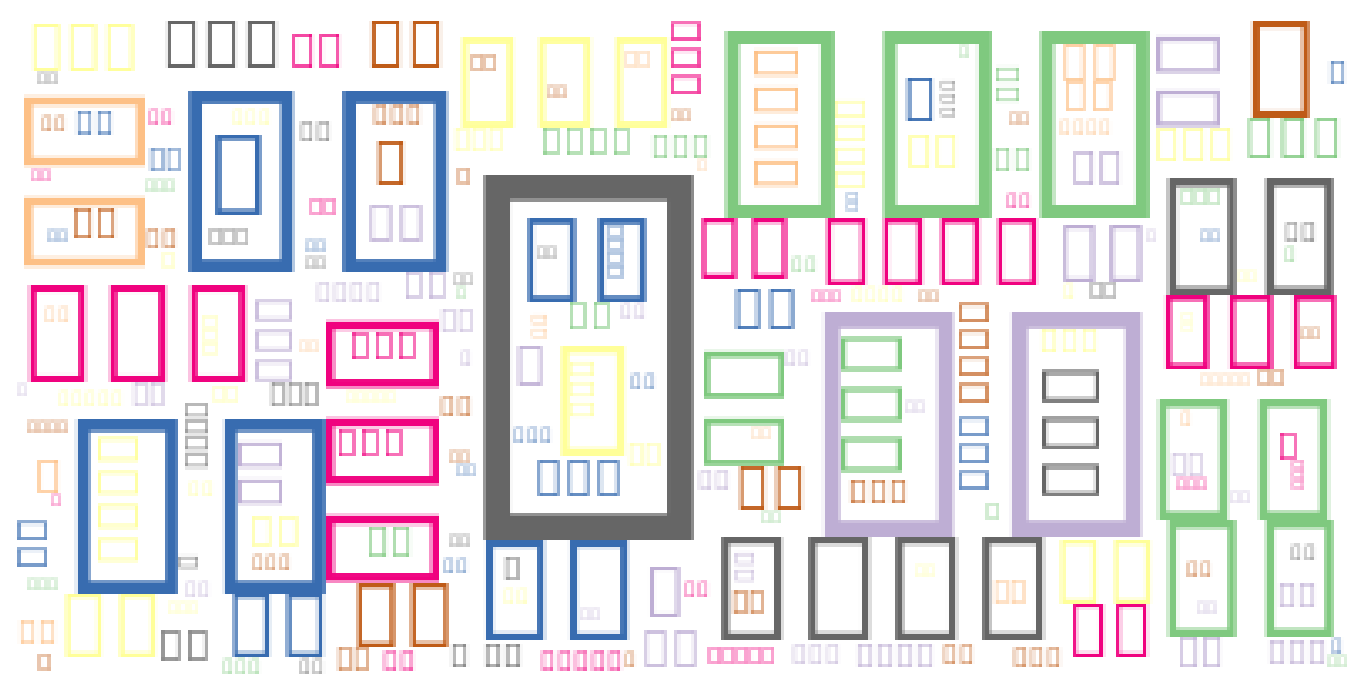

In [367]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',                             # 배경 색깔 정하기
                      colormap = 'Accent_r',                                # 폰트 색깔 정하기
                     ).generate_from_frequencies(dict(ko.vocab()))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [368]:
# 어쩄든 수작업 라벨링
pd.set_option('display.max_rows', 504)

In [377]:
list(flatten(ls))

['상큼',
 '매력',
 '아로마',
 '과일',
 '아로마',
 '각종',
 '꽃',
 '열대',
 '과일',
 '아로마',
 '과실',
 '향',
 '약간',
 '흙내',
 '음',
 '블루베리',
 '아로마',
 '처음',
 '코',
 '적색',
 '과일',
 '후추',
 '등',
 '향신료',
 '향',
 '과일',
 '향',
 '자두',
 '라스베리',
 '및',
 '화이트',
 '후추',
 '향',
 '버터',
 '향',
 '열대',
 '과일',
 '향',
 '오크',
 '향',
 '조화',
 '루비',
 '칼라',
 '약간',
 '오크',
 '향',
 '쵸콜릿',
 '향',
 '자두',
 '체리',
 '향',
 '과일',
 '향',
 '후추',
 '커피',
 '향',
 '조화',
 '약간',
 '쵸콜릿',
 '향',
 '조화',
 '더욱',
 '체리',
 '블랙베리',
 '향',
 '자극',
 '삼나무',
 '향',
 '담배',
 '잎',
 '가죽',
 '로즈마리',
 '향',
 '전체',
 '과일',
 '향',
 '루비',
 '레드',
 '자두',
 '블랙베리',
 '카시스',
 '쵸콜릿',
 '바닐라',
 '카라멜',
 '향신료',
 '향',
 '매우',
 '농축',
 '질감',
 '과일',
 '향',
 '나무',
 '향',
 '조화',
 '과실',
 '류',
 '향',
 '아카시아',
 '류',
 '꽃',
 '향',
 '과실',
 '류',
 '향',
 '븕',
 '과실',
 '류',
 '향',
 '블랙',
 '올리브',
 '향',
 '과실',
 '류',
 '향',
 '블랙베리',
 '체리',
 '자두',
 '등',
 '아로마',
 '과일',
 '류',
 '아로마',
 '후추',
 '스모크',
 '블랙',
 '올리브',
 '등',
 '향',
 '과실',
 '향',
 '미네랄',
 '아로마',
 '집중',
 '꽃',
 '향기',
 '사과',
 '및',
 '배향',
 '블랙베리',
 '향',
 '과일',
 '향',
 '사과',
 '배',
 '과일

In [379]:
floral = ['로럴', '백합', '자스민', '제라니움', '쟈스민', '피오니', '꽃', '아이리스', '부케', '아카시아', '장미']
fruit = ['트로피칼', '복숭아', '과일', '열매', '스트로베리', '딸기', '블루베리', '베리', '아로니아', '과실', '라스베리', '자두', '체리', '카시스', '사과', '배향', '커런트', '멜론', '애플', '프룻', '매실', '프루티']
cologne = ['트러스', '씨트런향', '자몽', '오렌지', '레몬', '귤', '라임']
oriental = ['에스프레소', '향신료', '담배', '가죽', '쵸콜릿', '바닐라', '카라멜', '초콜릿', '캬라멜', '스모크', '흑연', '감초', '모카', '스파이', '꿀', '씨나몬', '헤이즐넛', '코코아', '타바코', '시가', '라벤다', '라벤더', '레더', '발사믹']
earth = ['낙엽', '흙내', '후추', '오크', '커피', '삼나무', '로즈마리', '나무', '미네랄', '버섯', '허브', '페퍼', '미네랄', '토양']

In [380]:
for name, column in zip(['floral', 'fruit', 'cologne', 'oriental', 'earth'], [floral, fruit, cologne, oriental, earth]):
    df[name] = 0
    for ingredients in column:
        df.loc[df[df.food_pairing.str.contains(ingredients)].index, name] = 1

In [378]:
df.head(10)

,title,img_link,alcohol,size,wine_type,sparkling,sweetness,grape_type,country,aroma,...,red_meat,seafood,dessert,fruits_vegetables,pasta,floral,fruit,cologne,oriental,earth
0,2% Sweet White,http://www.wine.co.kr/upload/products/wineList...,2.0%,750ml,White,Still,Sweet,Moscato,"이태리, 피에몬테, 아스티",상큼하고 매력적인 아로마,...,0,0,0,0,1,0,0,0,0,0
1,Gran Tierra Red,http://www.wine.co.kr/upload/products/wineList...,11.0%,750ml,Red,Still,Semi Sweet,Tempranillo,"스페인, 발데빼냐스",신선한 과일의 아로마,...,1,0,0,0,0,0,0,0,0,0
2,Gran Tierra White,http://www.wine.co.kr/upload/products/wineList...,10.5%,750ml,White,Still,Semi Sweet,Airen,"스페인, 발데빼냐스",각종 꽃과 열대 과일의 아로마,...,0,1,0,1,0,0,0,0,0,0
3,Ch' Carmarsac Cuvee Prince Noir,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Cabernet Sauvignon,"프랑스, 보르도, 오메독","붉은 과실향,약간의 흙내음",...,1,0,0,0,0,0,0,0,0,0
4,HOBNOB Cabernet Sauvignon,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Cabernet Sauvignon,"프랑스, 랑귀독",블루베리 아로마가 처음 코에 와 닿으며 적색과일과 함께후추 등의 향신료향이 느껴진다.,...,1,0,0,0,0,0,0,0,0,0
5,Casa Silva Coleccion Merlot,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Merlot,"칠레, 콜차구아 벨리(Colchagua Valley)","과일향, 자두, 라스베리, 및 화이트 후추향",...,1,0,0,0,0,0,0,0,0,0
6,Casa Silva Coleccion Chardonnay,http://www.wine.co.kr/upload/products/wineList...,13.5%,750ml,Red,Still,Dry,Chardonnay,"칠레, 콜차구아 벨리(Colchagua Valley)",버터향과 열대 과일향이 오크향과 잘 조화를 이루고 있습니다.,...,1,1,0,0,0,0,0,0,0,0
7,Casa Silva Coleccion Cabernet,http://www.wine.co.kr/upload/products/wineList...,13.5%,750ml,Red,Still,Dry,Cabernet Sauvignon,"칠레, 콜차구아 밸리(Colchagua Valley )",짙은 루비 칼라. 약간의 오크향과 쵸콜릿 향이 자두와 체리향,...,1,0,0,0,0,0,0,0,0,0
8,Casa Silva Quinta Generacion Cab-Car-Petit Verdo,http://www.wine.co.kr/upload/products/wineList...,14.0%,750ml,Red,Still,Dry,Cabernet Sauvignon,"칠레, Colchagua Valley","붉은 과일향, 후추 커피향이 잘 조화를 이루고 있으며, 약간의 쵸콜릿 향이 조화를 ...",...,1,0,0,0,0,0,0,0,0,0
9,San Felice Rosso di Montalcino DOCG,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,Red,Still,Dry,Sangiovese,"이태리, 토스카나, 몬탈치노","체리, 블랙베리의 향과 함께 자극적인 삼나무향",...,1,0,0,0,0,0,0,0,0,1


In [381]:
for name in ['floral', 'fruit', 'cologne', 'oriental', 'earth']:
    print(df[name].value_counts())

0    504
Name: floral, dtype: int64
0    467
1     37
Name: fruit, dtype: int64
0    504
Name: cologne, dtype: int64
0    496
1      8
Name: oriental, dtype: int64
0    475
1     29
Name: earth, dtype: int64


In [385]:
df[df['fruit']==1]

,title,img_link,alcohol,size,wine_type,sparkling,sweetness,grape_type,country,aroma,...,red_meat,seafood,dessert,fruits_vegetables,pasta,floral,fruit,cologne,oriental,earth
13,Cotes-du-Rhone Samorens,http://www.wine.co.kr/upload/products/wineList...,13.0%,750ml,White,Still,Dry,Roussanne,"프랑스, 론",아카시아류의 꽃의 향과 과실류의 향이 느껴집니다.,...,0,1,1,1,0,0,1,0,0,0
40,Banfi Rosa Regale Brachetto dAcgui DOCG,http://www.wine.co.kr/upload/products/wineList...,6.5%,750ml,Rose,Sparkling,Sweet,Brachetto,"이태리, 피에몬테, 아뀌",은은한 장미향,...,0,0,1,1,0,0,1,0,1,0
41,Banfi Rosa Regale Brachetto dAcgui DOCG375,http://www.wine.co.kr/upload/products/wineList...,6.5%,375ml,Rose,Sparkling,Sweet,Brachetto,"이태리, 피에몬테, 아뀌",은은한 장미향,...,0,0,1,1,0,0,1,0,1,0
74,Majuang Bella,http://www.wine.co.kr/upload/products/wineList...,5.0%,750ml,White,Sparkling,Sweet,Moscato,"이태리, 피에몬테(Piemonte)","백합, 리치, 복숭아 등 달콤하면서 우아한 풍미가 매우 풍성한 와인입니다.",...,0,0,1,1,0,0,1,0,0,0
82,Marc Hebrart Rose Brut,http://www.wine.co.kr/upload/products/wineList...,12.5%,750ml,Rose,Sparkling,Dry,Pinor Noir,"프랑스, 상파뉴","라즈베리, 레드커런트의 향이 풍성하게 살아남",...,0,1,0,1,0,0,1,0,0,0
83,Marc Hebrart Blanc de Blanc,http://www.wine.co.kr/upload/products/wineList...,12.5%,750ml,White,Sparkling,Dry,Chardonnay,"프랑스, 상파뉴","사과, 그레이프 푸르츠, 오렌지, 등의 풍부한 과일의 향",...,0,1,0,1,0,0,1,0,0,0
84,Marc Hebrart Selection Brut,http://www.wine.co.kr/upload/products/wineList...,12.5%,750ml,White,Sparkling,Dry,Pinor Noir,"프랑스, 상파뉴","봄양파, 미네랄의 진하고 농축된 향",...,0,1,0,1,0,0,1,0,0,0
85,Marc Hebrart Special Club,http://www.wine.co.kr/upload/products/wineList...,12.5%,750ml,White,Sparkling,Dry,Pinor Noir,"프랑스, 상파뉴","토스티한 미네랄, 스파이스, 배, 이스트의 아로마",...,0,1,0,1,0,0,1,0,0,0
92,M Riesling Sweet White,http://www.wine.co.kr/upload/products/wineList...,9.0%,750ml,White,Still,Sweet,Riesling,"독일, 모젤",풍부하고 신선한 과일향이 넘쳐는 아로마,...,0,1,1,1,0,0,1,0,0,0
93,Moselland Auslese QMP,http://www.wine.co.kr/upload/products/wineList...,8.0%,750ml,White,Still,Sweet,Riesling,"독일, 모젤",스파이시한 과일향,...,0,0,1,1,0,0,1,0,0,0
